In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

## Import Dataset

In [3]:
data = pd.read_csv('AAPL.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-01-2012,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
1,04-01-2012,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2,05-01-2012,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
3,06-01-2012,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
4,09-01-2012,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [4]:
data.shape

(2011, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2011 non-null   object 
 1   Open       2011 non-null   float64
 2   High       2011 non-null   float64
 3   Low        2011 non-null   float64
 4   Close      2011 non-null   float64
 5   Adj Close  2011 non-null   float64
 6   Volume     2011 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 110.1+ KB


In [6]:
data.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data.duplicated().any()

False

In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2011.000000,2011.000000,2011.000000,2011.000000,2011.000000,2.011000e+03
mean,126.707469,127.827594,125.580258,126.741235,119.505548,5.949670e+07
std,50.483753,50.926301,50.124940,50.578369,52.438444,4.683856e+07
min,55.424286,57.085712,55.014286,55.790001,48.921928,1.136200e+07
25%,85.882858,86.717858,85.056427,86.202145,75.056679,2.758565e+07
50%,113.050003,114.190002,111.870003,113.050003,105.222908,4.346900e+07
75%,165.190002,167.409996,163.424995,165.245002,160.047111,7.471030e+07
max,291.119995,293.970001,288.119995,291.519989,289.522614,3.765300e+08


## Data Pre-processing

In [9]:
data['Date']

0       03-01-2012
1       04-01-2012
2       05-01-2012
3       06-01-2012
4       09-01-2012
           ...    
2006    23-12-2019
2007    24-12-2019
2008    26-12-2019
2009    27-12-2019
2010    30-12-2019
Name: Date, Length: 2011, dtype: object

In [10]:
# convert date column into datetime format
data['Date'] = pd.to_datetime(data['Date'],format='%d-%m-%Y')

In [11]:
data.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [12]:
# set date column as index
data.set_index('Date',inplace=True)

In [13]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143,50.765709,75555200
2012-01-04,58.571430,59.240002,58.468571,59.062859,51.038536,65005500
2012-01-05,59.278572,59.792858,58.952858,59.718571,51.605175,67817400
2012-01-06,59.967144,60.392857,59.888573,60.342857,52.144630,79573200
2012-01-09,60.785713,61.107143,60.192856,60.247143,52.061932,98506100


In [14]:
# drop columns irrelevant
data.drop(['Adj Close','Volume'],inplace=True,axis=1)
data.head()

,Open,High,Low,Close
Date,,,,
2012-01-03,58.485714,58.928570,58.428570,58.747143
2012-01-04,58.571430,59.240002,58.468571,59.062859
2012-01-05,59.278572,59.792858,58.952858,59.718571
2012-01-06,59.967144,60.392857,59.888573,60.342857
2012-01-09,60.785713,61.107143,60.192856,60.247143


## EDA

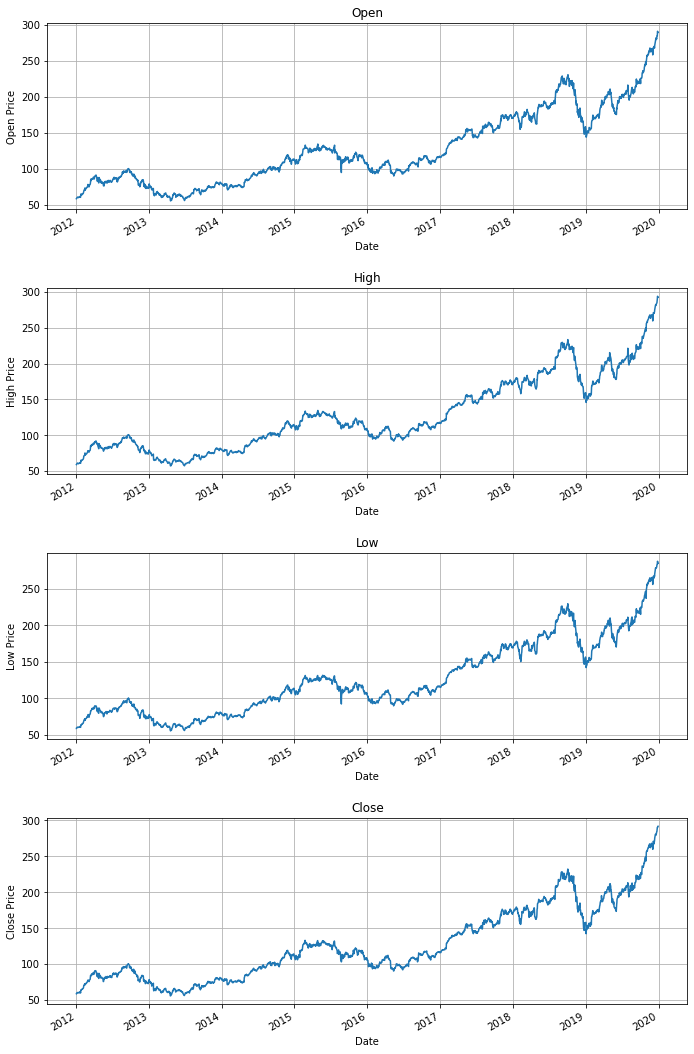

In [15]:
fig, (axs1,axs2,axs3,axs4) = plt.subplots(4,figsize=(10,15))

data['Open'].plot(ax=axs1)
axs1.set_xlabel('Date')
axs1.set_ylabel('Open Price')
axs1.grid(True)
axs1.set_title('Open')

data['High'].plot(ax=axs2)
axs2.set_xlabel('Date')
axs2.set_ylabel('High Price')
axs2.grid(True)
axs2.set_title('High')

data['Low'].plot(ax=axs3)
axs3.set_xlabel('Date')
axs3.set_ylabel('Low Price')
axs3.grid(True)
axs3.set_title('Low')

data['Close'].plot(ax=axs4)
axs4.set_xlabel('Date')
axs4.set_ylabel('Close Price')
axs4.grid(True)
axs4.set_title('Close')

fig.tight_layout(pad=2.0)

plt.show()

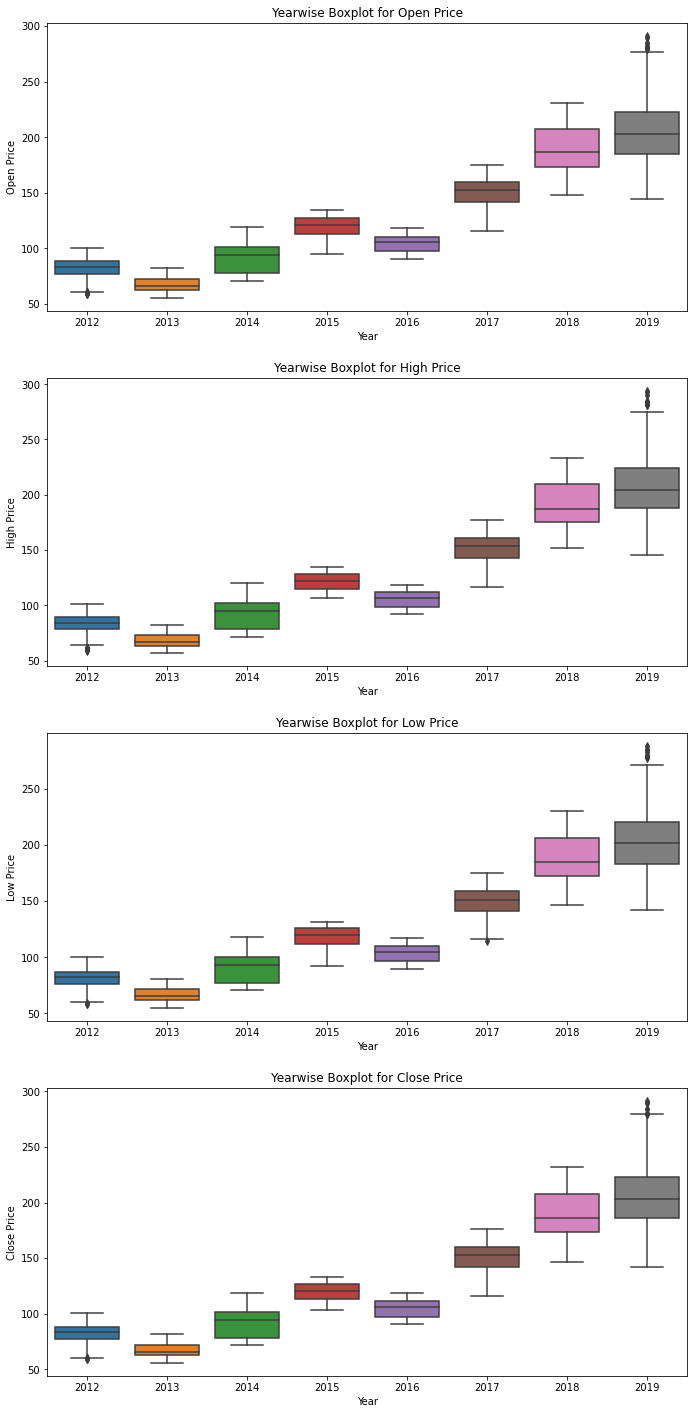

In [16]:
fig, (axs1,axs2,axs3,axs4) = plt.subplots(4,figsize=(10,20))

sns.boxplot(y=data['Open'],x=data.index.year,ax=axs1)
axs1.set_xlabel('Year')
axs1.set_ylabel('Open Price')
axs1.set_title('Yearwise Boxplot for Open Price')

sns.boxplot(y=data['High'],x=data.index.year,ax=axs2)
axs2.set_xlabel('Year')
axs2.set_ylabel('High Price')
axs2.set_title('Yearwise Boxplot for High Price')

sns.boxplot(y=data['Low'],x=data.index.year,ax=axs3)
axs3.set_xlabel('Year')
axs3.set_ylabel('Low Price')
axs3.set_title('Yearwise Boxplot for Low Price')

sns.boxplot(y=data['Close'],x=data.index.year,ax=axs4)
axs4.set_xlabel('Year')
axs4.set_ylabel('Close Price')
axs4.set_title('Yearwise Boxplot for Close Price')

fig.tight_layout(pad = 2.0)
plt.show()

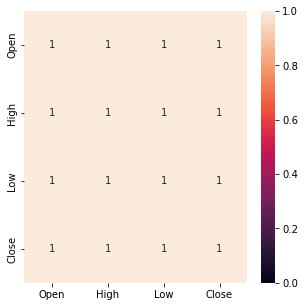

In [17]:
corr_matrix = data.corr()

plt.figure(figsize=(5,5))
sns.heatmap(data = corr_matrix,annot=True,vmin=0)
plt.show()

Multicollinearity between fetures are identified. <br> Close price is selected as target feature

In [18]:
data_close = pd.DataFrame(data['Close'])
data_close.head()

,Close
Date,
2012-01-03,58.747143
2012-01-04,59.062859
2012-01-05,59.718571
2012-01-06,60.342857
2012-01-09,60.247143


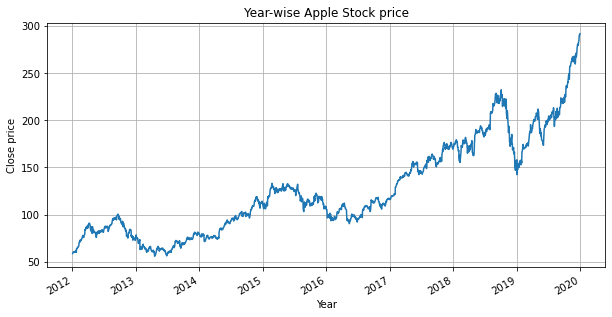

In [19]:
plt.figure(figsize=(10,5))
data_close['Close'].plot()
plt.grid(True)
plt.xlabel('Year')
plt.ylabel('Close price')
plt.title('Year-wise Apple Stock price')
plt.show()

Apple stock price is getting increased each year.<br>Apple stock price decreased by almost Rs. 75 in year 2018-19.

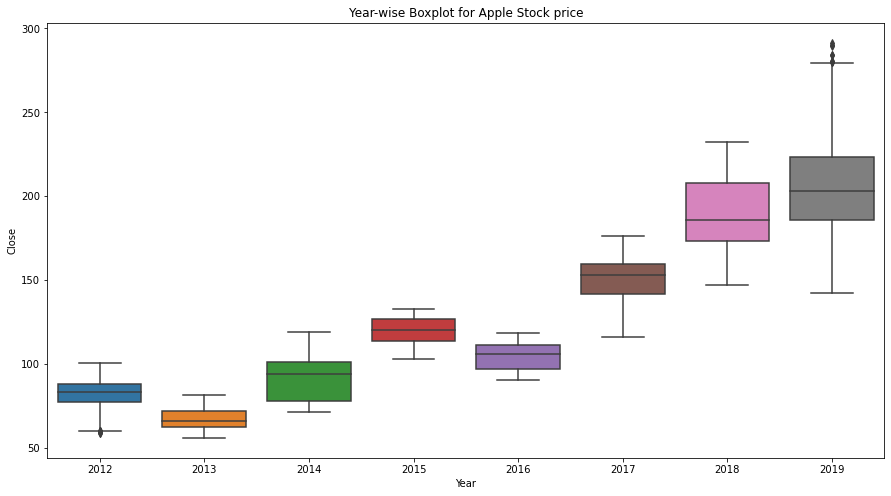

In [20]:
plt.figure(figsize=(15,8))
sns.boxplot(x= data_close.index.year, y= data_close['Close'])
plt.title('Year-wise Boxplot for Apple Stock price')
plt.xlabel('Year')
plt.ylabel('Close')
plt.show()

Outliers are detected in year 2012 and 2019.<br>2019 is the most volatile year.

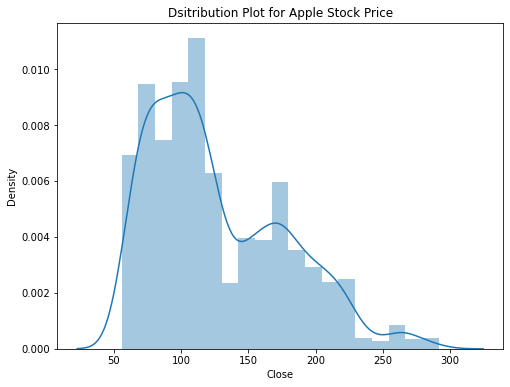

In [21]:
plt.figure(figsize=(8,6))
sns.distplot(data_close['Close'],)
plt.title('Dsitribution Plot for Apple Stock Price')
plt.show()

Stock price is right skewed.

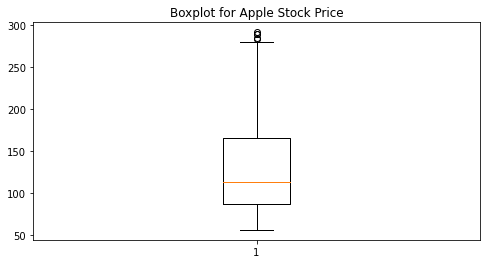

In [22]:
plt.figure(figsize=(8,4))
box = plt.boxplot(data_close['Close'])
plt.title('Boxplot for Apple Stock Price')
plt.show()

In [23]:
for elem in box['fliers']:
    print(elem)
    print(elem.get_ydata())


Line2D(_line6)
[284.       284.269989 289.910004 289.799988 291.519989]


In [24]:
data_close.loc[data_close['Close'] == 284.]

,Close
Date,
2019-12-23,284.0


In [25]:
data_close.loc[data_close['Close'] == 284.269989] 

,Close
Date,
2019-12-24,284.269989


In [26]:
data_close.loc[data_close['Close'] == 289.910004]

,Close
Date,
2019-12-26,289.910004


In [27]:
data_close.loc[data_close['Close'] == 289.799988 ]

,Close
Date,
2019-12-27,289.799988


In [28]:
data_close.loc[data_close['Close'] == 291.519989 ]

,Close
Date,
2019-12-30,291.519989


Outliers are detected on dates 2019-12-23, 2019-12-24, 2019-12-26, 2019-12-27 and 2019-12-30.

In [29]:
data_close['Day'] = data_close.index.strftime('%A')
data_close['Month'] = data_close.index.strftime('%B')
data_close['Year'] = data_close.index.year
data_close['Quarter'] = data_close.index.quarter
data_close['Week_Number'] = data_close.index.week
data_close

,Close,Day,Month,Year,Quarter,Week_Number
Date,,,,,,
2012-01-03,58.747143,Tuesday,January,2012,1,1
2012-01-04,59.062859,Wednesday,January,2012,1,1
2012-01-05,59.718571,Thursday,January,2012,1,1
2012-01-06,60.342857,Friday,January,2012,1,1
2012-01-09,60.247143,Monday,January,2012,1,2
...,...,...,...,...,...,...
2019-12-23,284.000000,Monday,December,2019,4,52
2019-12-24,284.269989,Tuesday,December,2019,4,52
2019-12-26,289.910004,Thursday,December,2019,4,52


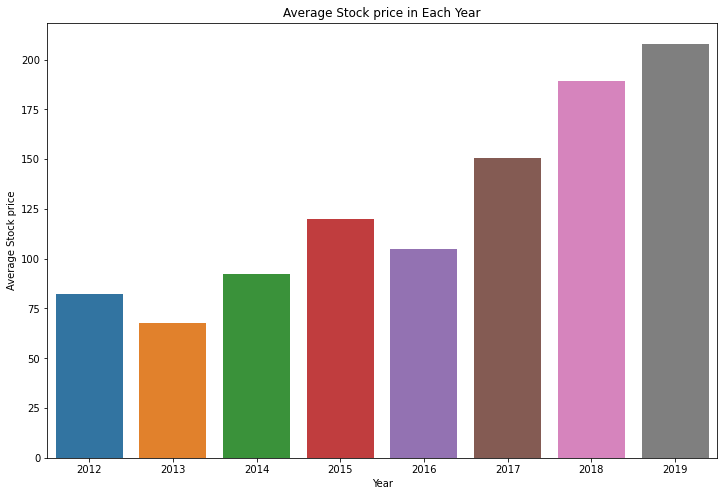

In [30]:
plt.figure(figsize=(12,8))
sns.barplot(x='Year', y='Close',data=data_close,palette='tab10',ci=0)
plt.title('Average Stock price in Each Year')
plt.xlabel('Year')
plt.ylabel('Average Stock price')
plt.show()

* Apple stock price is increasing each year.
* In 2013 and 2016 average stock price is lower than previous year.


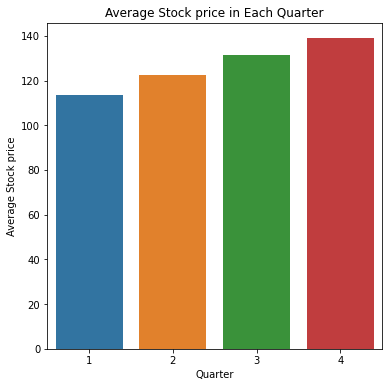

In [31]:
data_quarter = pd.DataFrame(data_close.groupby('Quarter')['Close'].mean()).reset_index()

plt.figure(figsize=(6,6))
sns.barplot(x='Quarter', y='Close',data=data_quarter,palette='tab10',ci=0)
plt.title('Average Stock price in Each Quarter')
plt.ylabel('Average Stock price')
plt.show()

* Q4 has the highest average stock price

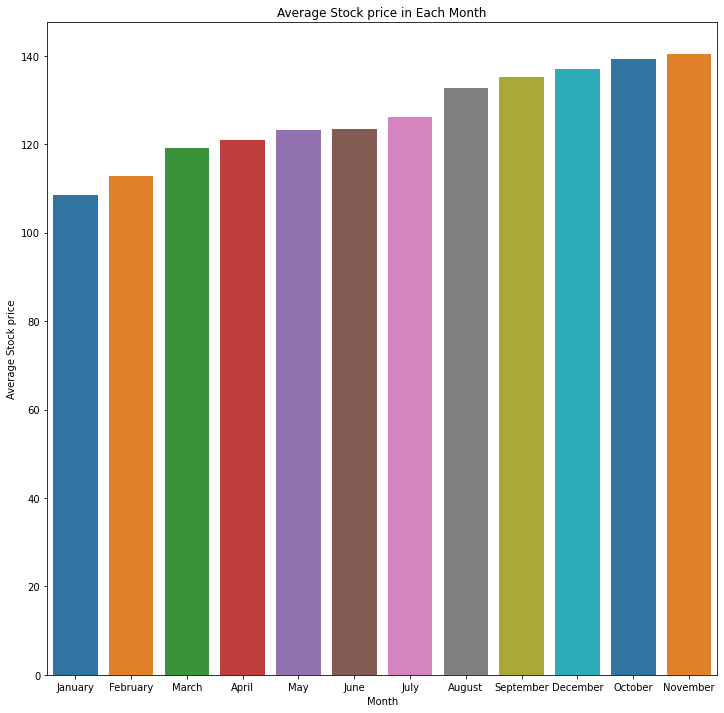

In [32]:
data_month = pd.DataFrame(data_close.groupby('Month')['Close'].mean()).reset_index().sort_values('Close')

plt.figure(figsize=(12,12))
sns.barplot(x='Month', y='Close',data=data_month,palette='tab10',ci=0)
plt.title('Average Stock price in Each Month')
plt.ylabel('Average Stock price')
plt.show()

* Apple stock price is highest in November.

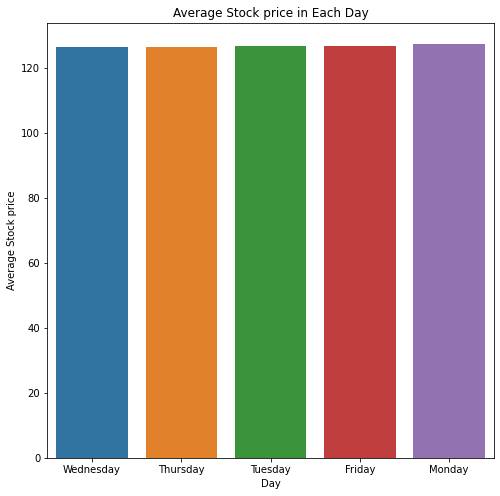

In [33]:
data_day = pd.DataFrame(data_close.groupby('Day')['Close'].mean()).reset_index().sort_values('Close')

plt.figure(figsize=(8,8))
sns.barplot(x='Day', y='Close',data=data_day,palette='tab10',ci=0)
plt.title('Average Stock price in Each Day')
plt.ylabel('Average Stock price')
plt.show()

* Average stock price are almost same in each day of week.
* It is slightly high on Mondays.

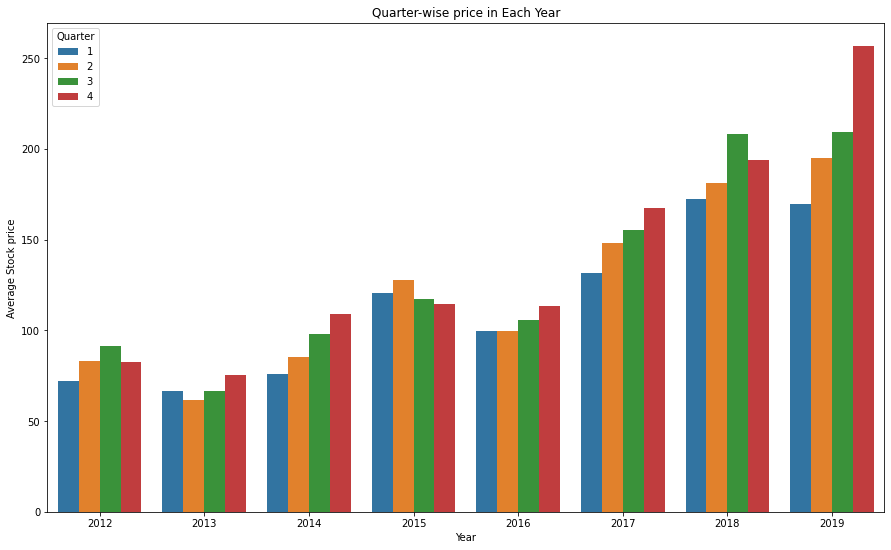

In [34]:
plt.figure(figsize=(15,9))
sns.barplot(x='Year', y='Close',data=data_close,hue='Quarter',palette='tab10',ci=0)
plt.title('Quarter-wise price in Each Year')
plt.xlabel('Year')
plt.ylabel('Average Stock price')
plt.show()

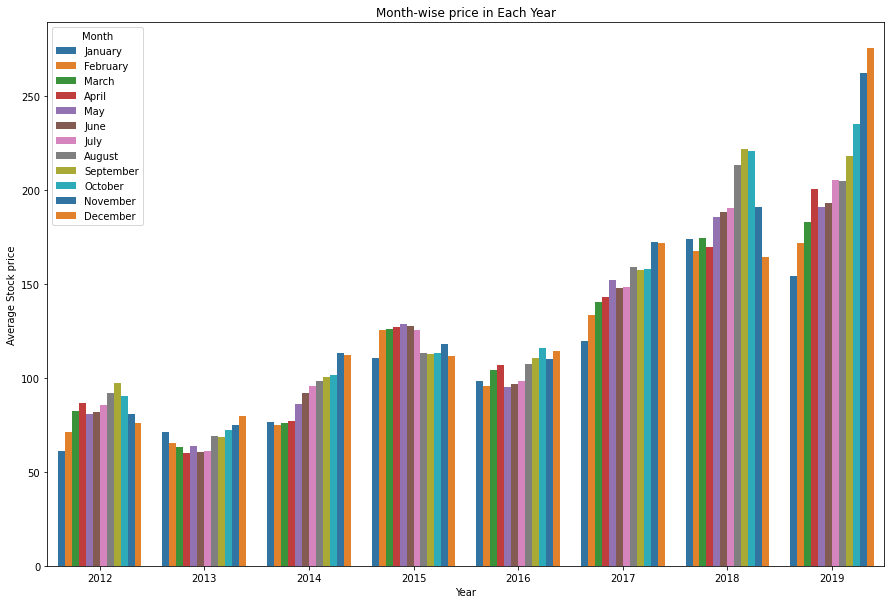

In [35]:
plt.figure(figsize=(15,10))
sns.barplot(x='Year', y='Close',data=data_close,hue='Month',palette='tab10',ci=0)
plt.title('Month-wise price in Each Year')
plt.xlabel('Year')
plt.ylabel('Average Stock price')
plt.show()

* On an average Apple stock price is low at start of the year compared to end of the year.

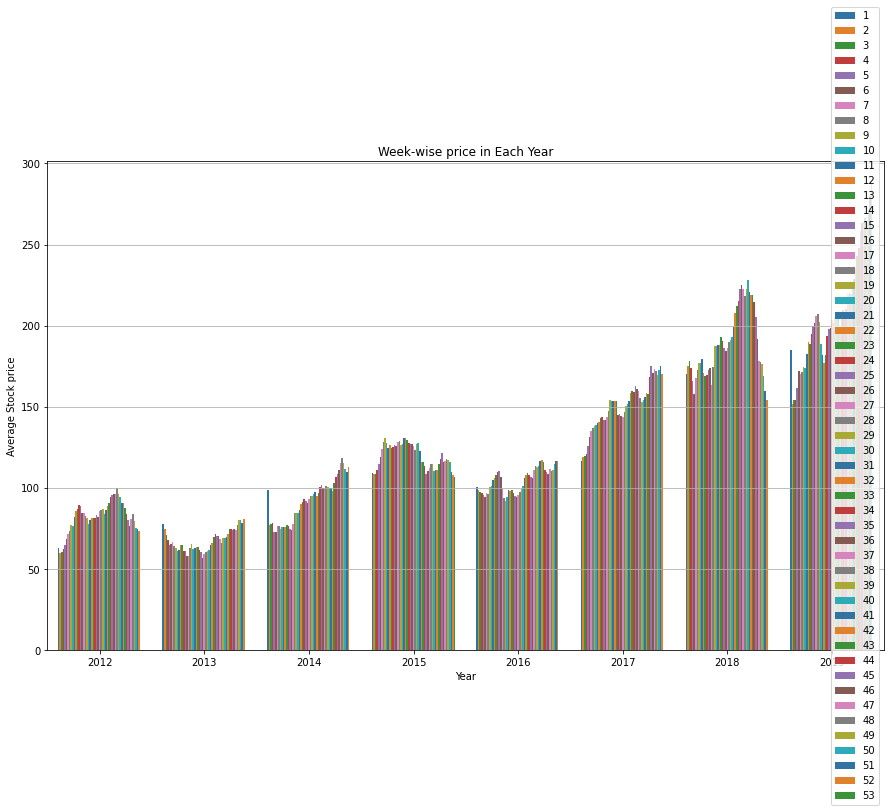

In [36]:
plt.figure(figsize=(15,9))
plt.grid(True)
sns.barplot(x='Year', y='Close',data=data_close,hue='Week_Number',palette='tab10',ci=0)
plt.title('Week-wise price in Each Year')
plt.xlabel('Year')
plt.ylabel('Average Stock price')
plt.legend(loc='right')
plt.show()

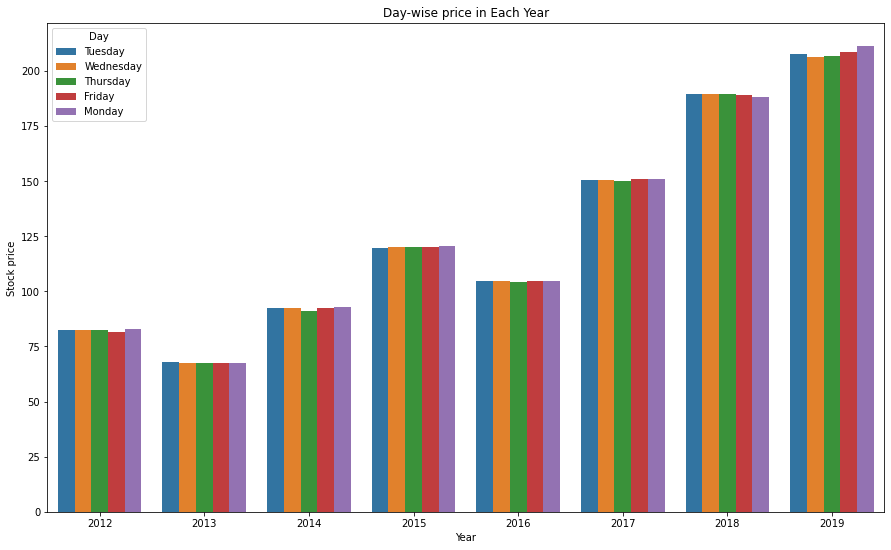

In [37]:
plt.figure(figsize=(15,9))
sns.barplot(x='Year', y='Close',data=data_close,hue='Day',palette='tab10',ci=0)
plt.title('Day-wise price in Each Year')
plt.xlabel('Year')
plt.ylabel('Stock price')
plt.show()

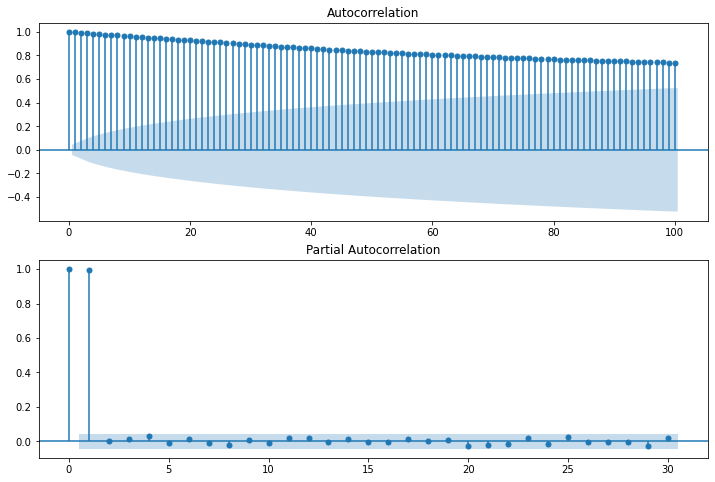

In [38]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,8))
plot_acf(data_close['Close'],lags=100,ax=ax1)
plot_pacf(data_close['Close'],lags=30,ax=ax2)
plt.show()

# Model Building

Checking stationarity of time series using Augmented Dickey Fuller Test

$H_0$: Time series is not stationary.<br>
$H_1$: Time series is stationary.

In [39]:
adfuller(data_close.Close)

(1.2193701254378024,
 0.996117017803201,
 9,
 2001,
 {'1%': -3.433622218212895,
  '5%': -2.8629854902259004,
  '10%': -2.5675395171404802},
 8633.09680956294)

* We fail to reject $H_0$ since the p value is greater than significant value.
* Time series is non-stationary.

Differencing series to make it stationary

### Differencing

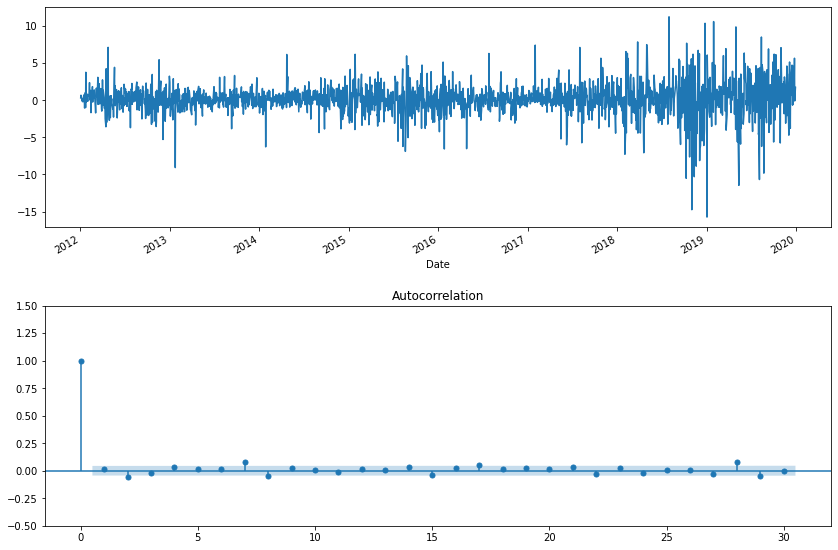

In [40]:
#First order differencing
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,8))
data_close['Close'].diff().plot(ax=ax1)
plot_acf(data_close['Close'].diff().dropna(),lags=30,ax=ax2)
ax2.set_ylim(-0.5,1.5)
plt.tight_layout(pad=2)
plt.show()

In [41]:
adfuller(data_close.Close.diff().dropna())

(-13.625534323873248,
 1.763123198721029e-25,
 8,
 2001,
 {'1%': -3.433622218212895,
  '5%': -2.8629854902259004,
  '10%': -2.5675395171404802},
 8629.540212595413)

* p-value is less than significant value. Therefore series is stationary now.

* Order of differencing is 1.

### Order of AR term

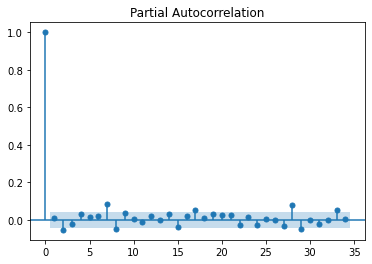

In [42]:
plot_pacf(data_close['Close'].diff().dropna())

plt.show()

### Order of MA term

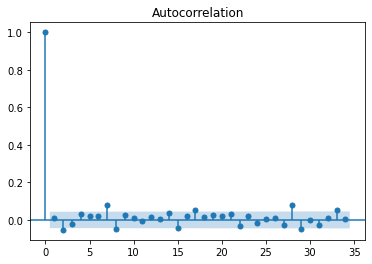

In [43]:
plot_acf(data_close['Close'].diff().dropna())
plt.show()

### ARIMA Model

In [44]:
model_arima = ARIMA(data_close['Close'],order=(1,1,1))
arima_fit = model_arima.fit()
arima_fit.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 2010
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4367.774
Method:                       css-mle   S.D. of innovations              2.126
Date:                Sat, 26 Nov 2022   AIC                           8743.547
Time:                        11:40:32   BIC                           8765.971
Sample:                             1   HQIC                          8751.779
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1159      0.048      2.419      0.016       0.022       0.210
ar.L1.D.Close    -0.8386      0.121     -6.904      0.000      -1.077      -0.601
ma.L1.D.Close     0.8576      0.114      7.498      0.000       0.633       1.082
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1924           +0.0000j            1.1924            0.5000
MA.1           -1.1661           +0.0000j            1.1661            0.5000
-----------------------------------------------------------------------------
"""

* p-values of AR(1) and MA(1) terms are highly significant.

In [45]:
prediction = pd.DataFrame(arima_fit.predict(typ='levels'),columns=['Close'])
prediction

,Close
Date,
2012-01-04,58.862994
2012-01-05,59.182287
2012-01-06,59.841167
2012-01-09,60.462269
2012-01-10,60.356024
...,...
2019-12-23,279.595228
2019-12-24,284.166217
2019-12-26,284.345567


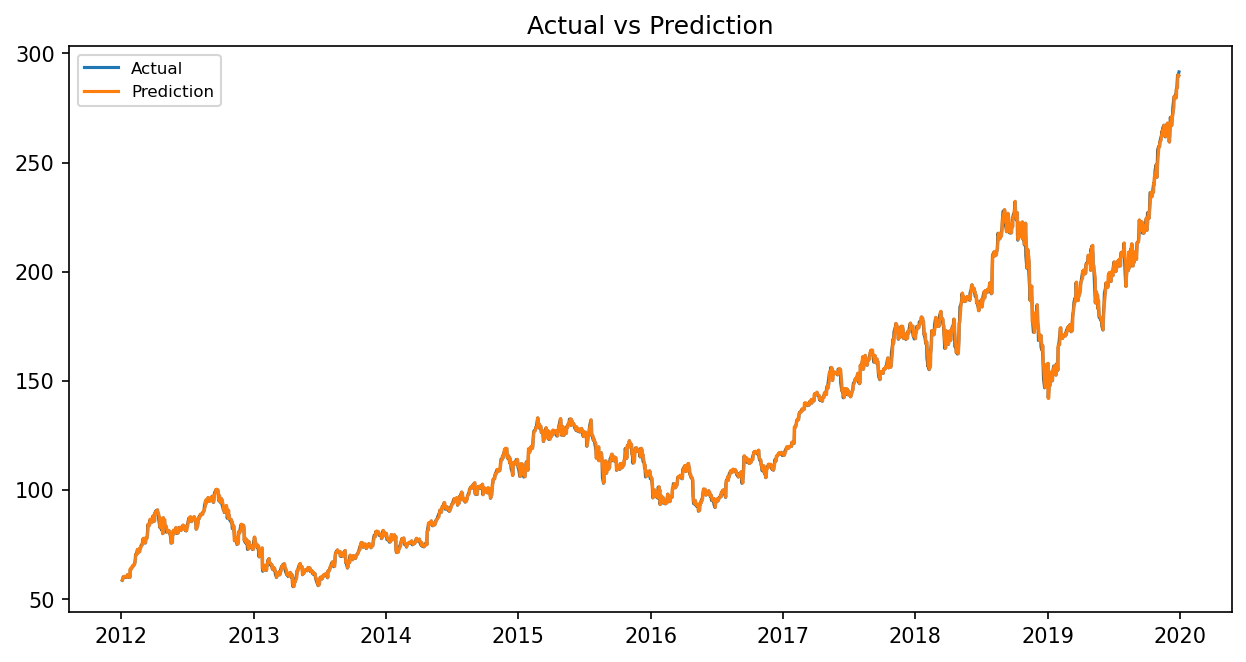

In [48]:
plt.figure(figsize=(10,5), dpi=150)
plt.plot(data_close['Close'], label='Actual')
plt.plot(prediction, label='Prediction')
plt.title('Actual vs Prediction')
plt.legend(loc='upper left', fontsize=8)
plt.show()

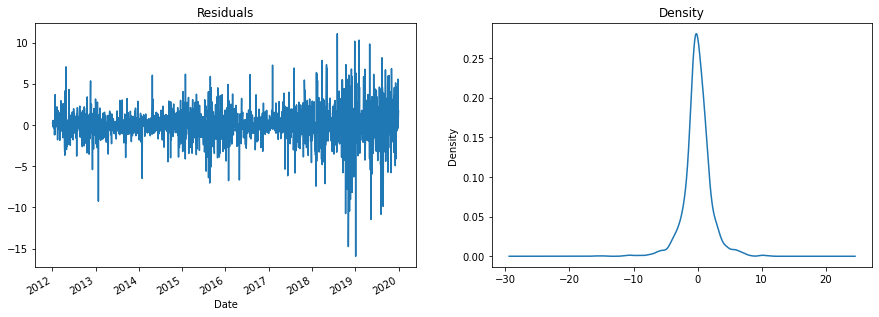

In [49]:
# Residual plot
residuals = arima_fit.resid

fig, axs = plt.subplots(1,2,figsize=(15,5))
residuals.plot(title="Residuals", ax=axs[0])
residuals.plot(kind='kde', title='Density', ax=axs[1])
plt.show()

* Model residuals follows normal distribution with 0 mean and constant variance.

In [50]:
data_close = data_close.drop(['Day','Month','Year','Quarter','Week_Number'],axis=1)

In [51]:
data_train = data_close.loc[:'2017-12-29']
data_test = data_close.loc['2018-01-02':]

In [77]:
model_arima = ARIMA(data_train['Close'],order=(1,1,1))
result = model_arima.fit()
result.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1508
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2793.172
Method:                       css-mle   S.D. of innovations              1.542
Date:                Sat, 26 Nov 2022   AIC                           5594.343
Time:                        14:25:45   BIC                           5615.617
Sample:                             1   HQIC                          5602.267
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0732      0.041      1.805      0.071      -0.006       0.153
ar.L1.D.Close    -0.3397      0.470     -0.723      0.470      -1.261       0.582
ma.L1.D.Close     0.3687      0.464      0.794      0.427      -0.541       1.279
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.9435           +0.0000j            2.9435            0.5000
MA.1           -2.7121           +0.0000j            2.7121            0.5000
-----------------------------------------------------------------------------
"""

In [53]:
test_pred = pd.DataFrame(result.predict(len(data_train),len(data_train)+501,typ='levels'),columns=data_test.columns)
test_pred.index = data_test.index
test_pred

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Close
Date,
2018-01-02,169.249439
2018-01-03,169.340955
2018-01-04,169.407985
2018-01-05,169.483334
2018-01-08,169.555857
...,...
2019-12-23,205.663116
2019-12-24,205.736355
2019-12-26,205.809595


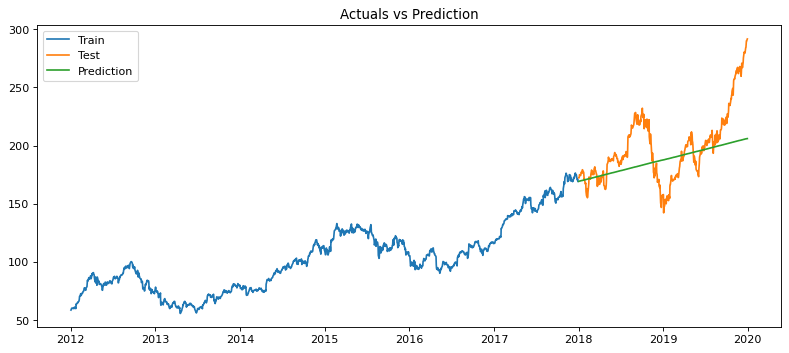

In [65]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(test_pred, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper left', fontsize=10)
plt.show()

In [55]:
mse = mean_squared_error(test_pred.Close,data_test.Close)
rmse = np.round(np.sqrt(mse),2)
print(f' RMSE = ',rmse)

 RMSE =  26.83


In [56]:
mape = mean_absolute_percentage_error(test_pred.Close,data_test.Close)
mape

0.10357167848023656

In [75]:
forecast = arima_fit.predict(len(data_close),len(data_close)+30,typ='levels')
forecast

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


2010    291.772180
2011    291.773694
2012    291.985431
2013    292.020870
2014    292.204156
2015    292.263455
2016    292.426732
2017    292.502811
2018    292.652016
2019    292.739896
2020    292.879204
2021    292.975384
2022    293.107732
2023    293.209748
2024    293.337202
2025    293.443323
2026    293.567334
2027    293.676342
2028    293.797932
2029    293.908971
2030    294.028858
2031    294.141324
2032    294.260014
2033    294.373485
2034    294.491332
2035    294.605509
2036    294.722764
2037    294.837438
2038    294.954277
2039    295.069300
2040    295.185845
dtype: float64

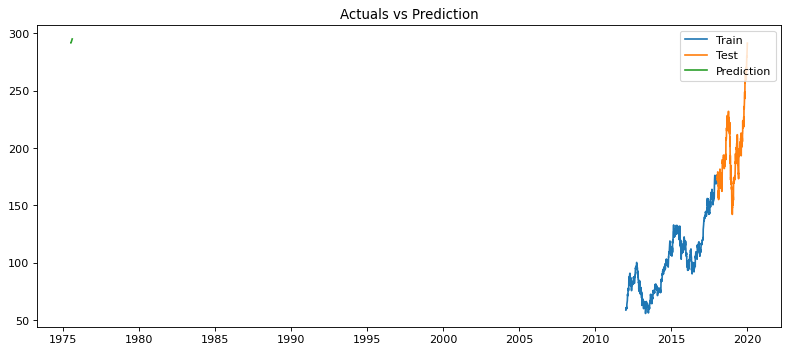

In [76]:
plt.figure(figsize=(12,5), dpi=80)
plt.plot(data_train, label = 'Train')
plt.plot(data_test, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('Actuals vs Prediction')
plt.legend(loc='upper right', fontsize=10)
plt.show()